In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv("Dataset/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df['Spending Score (1-100)'].max()

99

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
df.rename(columns={'Annual Income (k$)':"Income","Spending Score (1-100)" : "Spending_score"},inplace=True)

In [12]:
df.head()

,Gender,Age,Income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


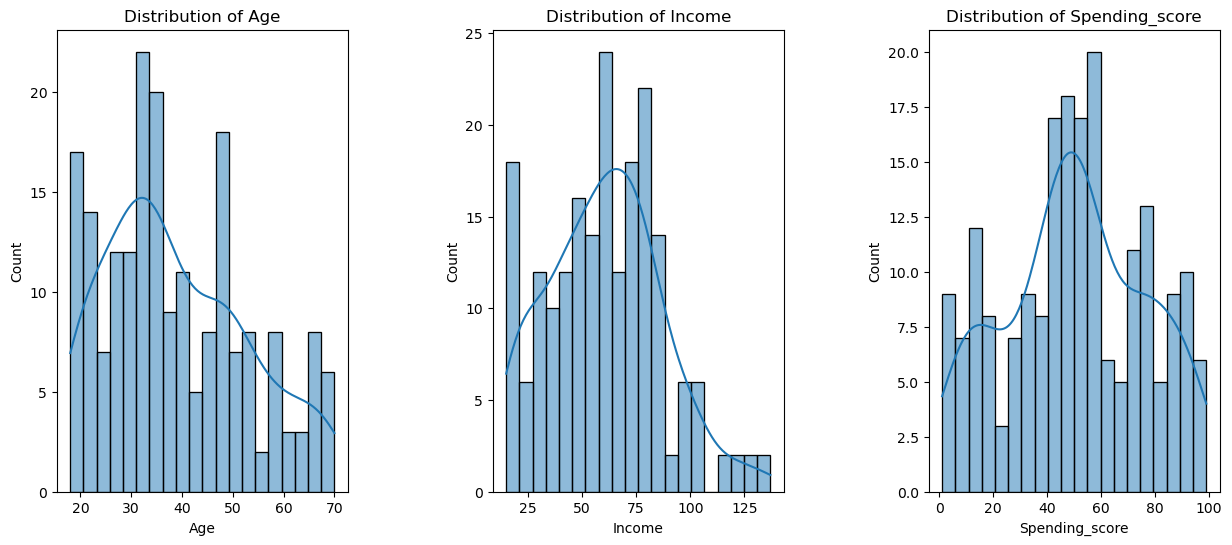

In [32]:
plt.figure(figsize=(15, 6))  # Set the figure size
n = 0
for x in ['Age', 'Income', 'Spending_score']:
    n += 1
    plt.subplot(1, 3, n)  # Create subplots in a 1x3 grid
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots
    sns.histplot(df[x], bins=20, kde=True)  # Use sns.histplot instead of sns.displot
    plt.title(f'Distribution of {x}')  # Add a title for each subplot

plt.show() 

C:\Users\papal\AppData\Local\Temp\ipykernel_13580\523249464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Gender',data=df, palette=['#0072B8','#FF9A00'])


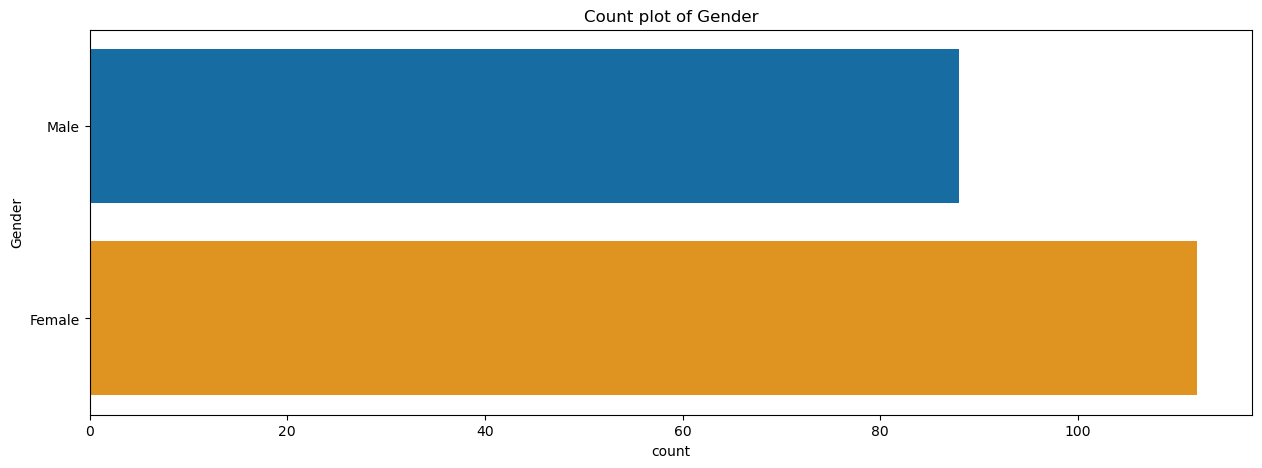

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df, palette=['#0072B8','#FF9A00'])
plt.title("Count plot of Gender")
plt.show()

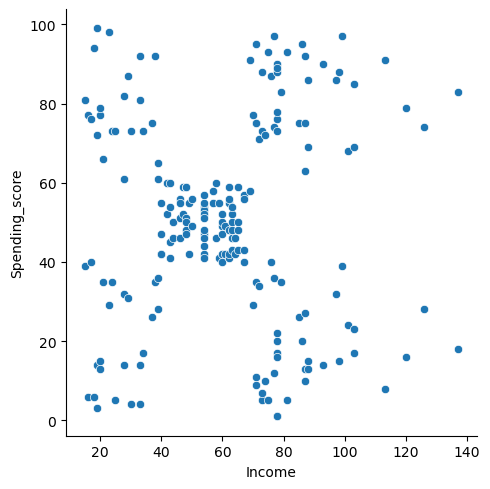

In [56]:
sns.relplot(x='Income',y='Spending_score',data=df)

C:\Users\papal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

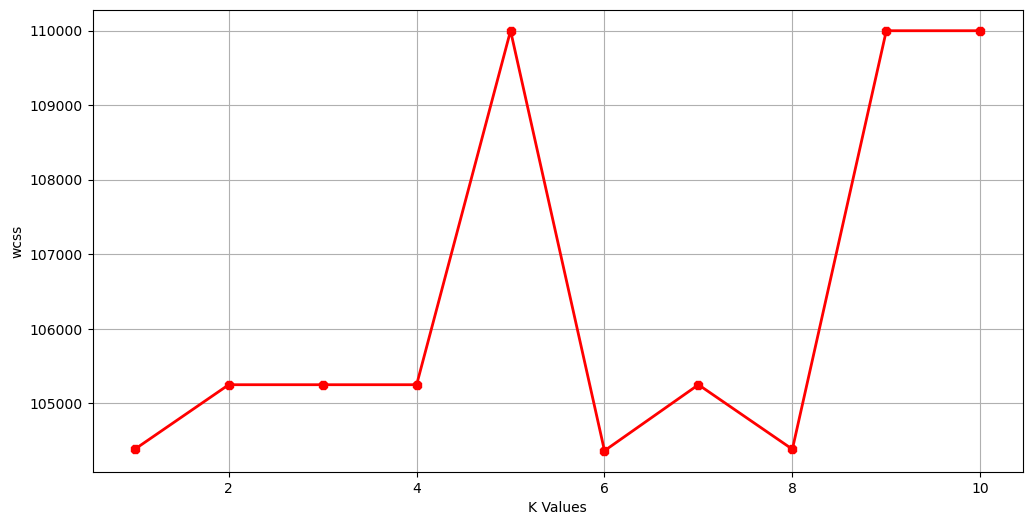

In [62]:
x1 = df.loc[:,['Age','Income','Spending_score']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=4,init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker='8')
plt.xlabel("K Values")
plt.ylabel("wcss")
plt.show()

In [64]:
kmeans = KMeans(n_clusters=4)
labal = kmeans.fit_predict(x1)
print(labal)

[2 2 3 2 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 3 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 3 3 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 3 2 2 2 3 3 3 3 2 3 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


C:\Users\papal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [66]:
print(kmeans.cluster_centers_)

[[32.875      86.1        81.525     ]
 [40.39473684 87.         18.63157895]
 [25.05660377 40.73584906 62.62264151]
 [52.05797101 46.42028986 39.88405797]]
